# Trending YouTube Video Statistics EDA

#### In this notebook, we will analyse YouTube trending videos using the US dataset downloaded from Kaggle
#### https://www.kaggle.com/datasnaek/youtube-new?select=USvideos.csv

### Loading libraries and dataset

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from collections import Counter
import wordcloud
import warnings
warnings.filterwarnings('ignore')

In [24]:
df = pd.read_csv("USvideos.csv")

In [25]:
# Checking the file's shape
df.shape

(40949, 16)

#### We can see that the dataset has 40.949 observations and 16 variables

In [26]:
# Looking at the top 5 rows
df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [27]:
# Checking columns datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

#### There are null values in the "description" column

In [28]:
# Missing values
df.dropna(inplace=True)

In [29]:
df.shape

(40379, 16)

#### Now we have 40.379 observations and 16 variables

In [30]:
# Counting unique values
df.nunique()

video_id                   6254
trending_date               205
title                      6357
channel_title              2142
category_id                  16
publish_time               6172
tags                       6008
views                     39927
likes                     29664
dislikes                   8460
comment_count             13684
thumbnail_link             6255
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64

In [31]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40379.000000,4.037900e+04,4.037900e+04,4.037900e+04,4.037900e+04
mean,19.944253,2.370839e+06,7.461677e+04,3.508122e+03,8.287396e+03
std,7.594850,7.428515e+06,2.296172e+05,2.317486e+04,3.431605e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.470760e+05,5.621500e+03,2.050000e+02,6.230000e+02
50%,24.000000,6.895970e+05,1.837100e+04,6.370000e+02,1.874000e+03
75%,25.000000,1.834912e+06,5.567200e+04,1.948000e+03,5.787000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.643059e+06,1.228655e+06


In [32]:
# Loading json with category names
newcategory = {}

with open('US_category_id.json') as json_file:
    datajson = json.load(json_file)
    for item in datajson['items']:
        newcategory[int(item['id'])] = item['snippet']['title']
        
newcategory

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [33]:
df['category_name'] = [newcategory[x] for x in df['category_id']]

In [34]:
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy


In [35]:
# Creating columns publish_day and publish_hour
df['publish_time'] = pd.to_datetime(df['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
df['publish_day'] = df['publish_time'].dt.day
df['publish_hour'] = df['publish_time'].dt.hour

In [36]:
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,publish_day,publish_hour
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,13,17
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment,13,7
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,12,19


### Top 15 trending channels

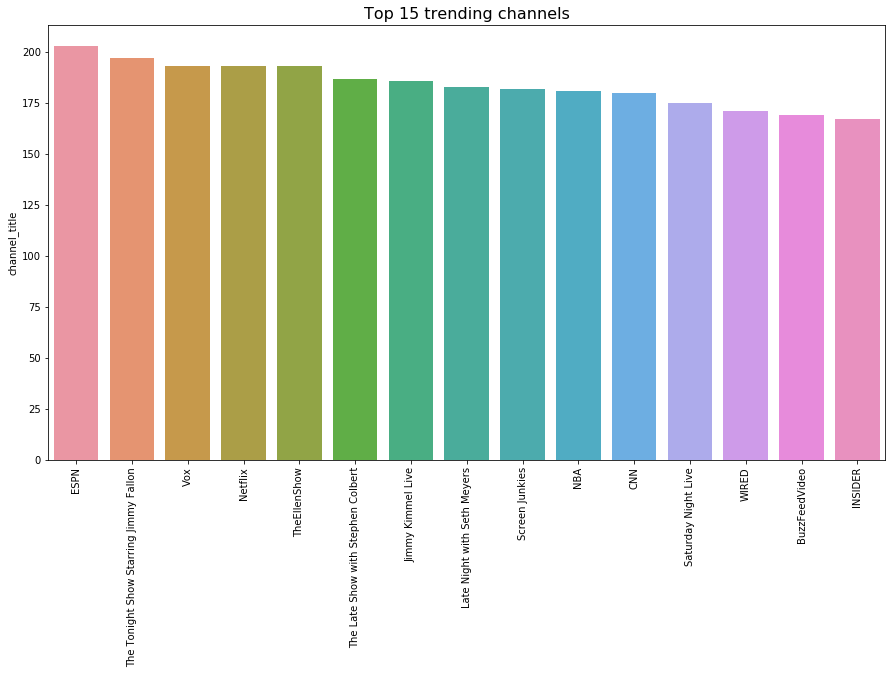

In [37]:
top_channel = pd.DataFrame(df['channel_title'].value_counts().head(15))

plt.figure(figsize = (15,8))
categorychart = sns.barplot(
    x=top_channel.index,
    y='channel_title',
    data = top_channel
)
plt.title('Top 15 trending channels', fontsize=16)
tl = categorychart.set_xticklabels(categorychart.get_xticklabels(), rotation=90)

### Checking duplicated video_id

In [38]:
df['video_id'].duplicated().any()

True

In [88]:
df[df['video_id']=='VYOjWnS4cMY'].head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,publish_day,publish_hour,title_length
33351,VYOjWnS4cMY,18.08.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06 04:00:07,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",31648454,1405355,51547,149473,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,6,4,51
33557,VYOjWnS4cMY,18.09.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06 04:00:07,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",47169016,1841540,79717,194822,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,6,4,51
33772,VYOjWnS4cMY,18.10.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06 04:00:07,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",60776509,2183732,104377,232723,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,6,4,51


#### The same video was trending on different days, so we are going to remove video_id duplicates

In [40]:
#Removing duplicate rows with the same video_id, leaving only the last per video_id
newdf = df.sort_values('views', ascending=False).drop_duplicates('video_id').sort_index()
newdf.shape

(6254, 19)

#### Now we have 6.351 observations and 17 variables

### Counting videos by category

In [41]:
# Count videos by category
newdf.category_name.value_counts()

Entertainment            1595
Music                     794
Howto & Style             592
Comedy                    539
News & Politics           490
People & Blogs            476
Sports                    439
Science & Technology      376
Film & Animation          320
Education                 248
Pets & Animals            139
Gaming                    101
Autos & Vehicles           69
Travel & Events            59
Nonprofits & Activism      13
Shows                       4
Name: category_name, dtype: int64

In [131]:
newdf['category_name'].value_counts()

Entertainment            1595
Music                     794
Howto & Style             592
Comedy                    539
News & Politics           490
People & Blogs            476
Sports                    439
Science & Technology      376
Film & Animation          320
Education                 248
Pets & Animals            139
Gaming                    101
Autos & Vehicles           69
Travel & Events            59
Nonprofits & Activism      13
Shows                       4
Name: category_name, dtype: int64

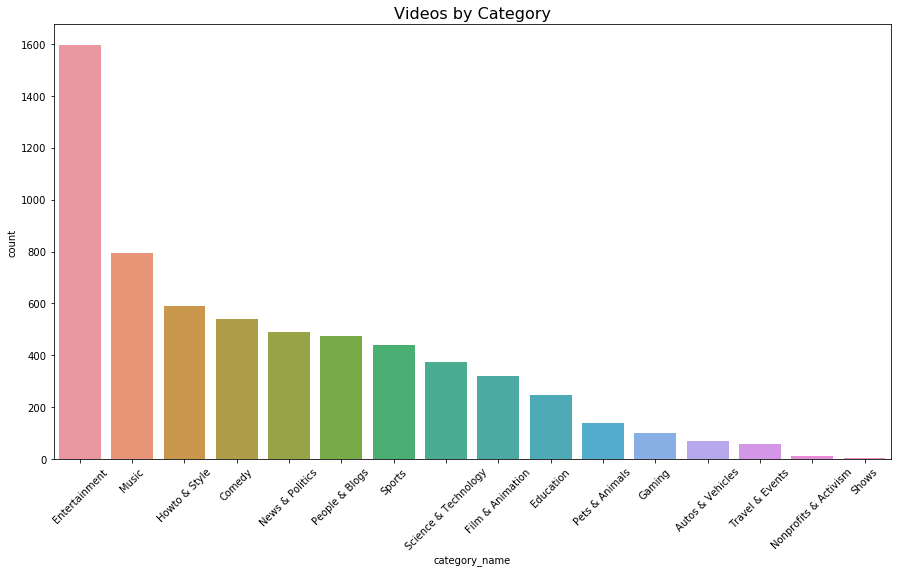

In [42]:
plt.figure(figsize = (15,8))
categorychart = sns.countplot(
    x='category_name',
    data = newdf,
    order = newdf['category_name'].value_counts().index
)
plt.title('Videos by Category', fontsize=16)
tl = categorychart.set_xticklabels(categorychart.get_xticklabels(), rotation=45)

#### We have more Entertainment and Music videos than Shows in this dataset

### Top 15 most visualized videos

In [49]:
filtered_columns = ['title','views', 'likes', 'dislikes', 'comment_count']

In [50]:
# Showing top 15 most visualized videos (chart)
vizdata = newdf[filtered_columns].nlargest(15,'views')
vizdata

,title,views,likes,dislikes,comment_count
38547,Childish Gambino - This Is America (Official V...,225211923,5023450,343541,517232
6181,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,149376127,3093544,1643059,810698
34708,Ariana Grande - No Tears Left To Cry,148689896,3094021,129502,242039
34888,"Becky G, Natti Natasha - Sin Pijama (Official ...",139334502,1425496,119798,83941
38273,BTS (방탄소년단) 'FAKE LOVE' Official MV,123010920,5613827,206892,1228655
34747,The Weeknd - Call Out My Name (Official Video),122544931,1427436,40837,55320
2587,"Luis Fonsi, Demi Lovato - Échame La Culpa",102012605,2376636,117196,134224
40869,"Cardi B, Bad Bunny & J Balvin - I Like It [Off...",94254507,1816753,102474,101077
4997,Marvel Studios' Avengers: Infinity War Officia...,91933007,2625661,53709,350458
25947,Maluma - El Préstamo (Official Video),87264467,815369,71494,35945


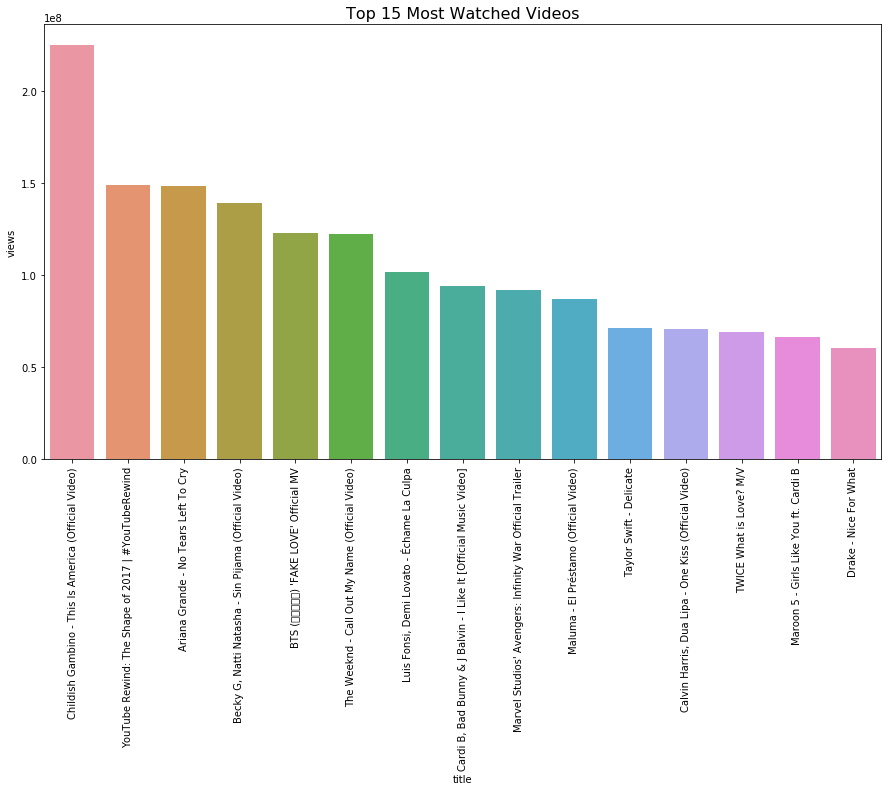

In [51]:
plt.figure(figsize = (15,8))
vizchart = sns.barplot(x='title', y='views', data=vizdata)
plt.title('Top 15 Most Watched Videos', fontsize=16)
tl = vizchart.set_xticklabels(vizchart.get_xticklabels(), rotation=90, fontsize=10)

### Top 15 most liked videos

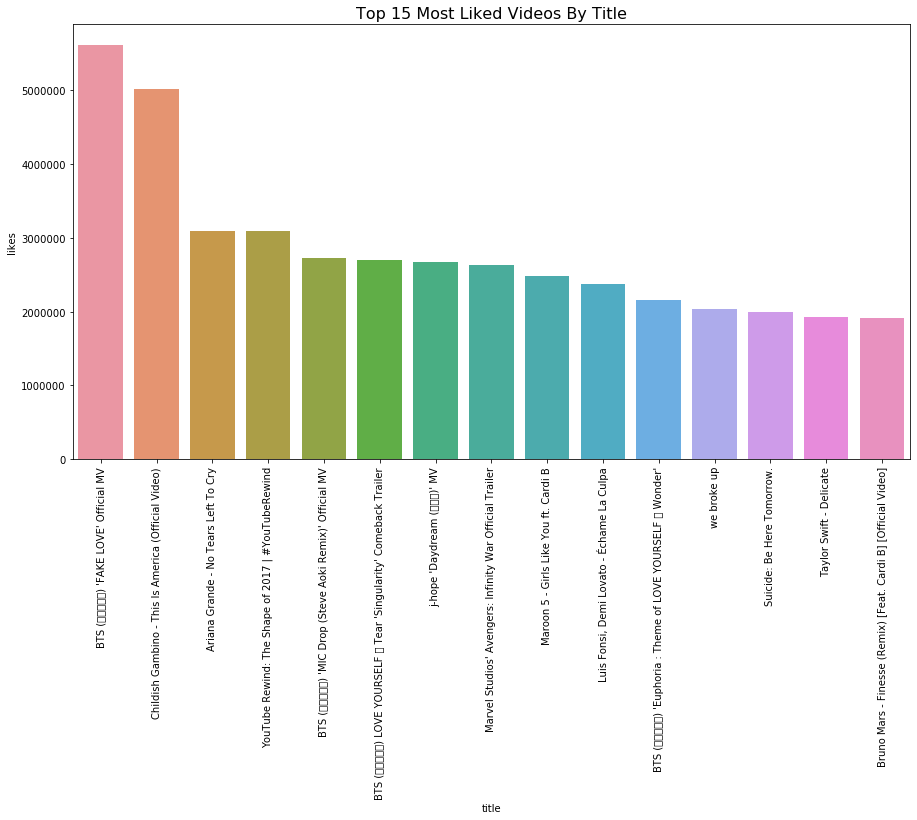

In [52]:
# Showing top 15 most liked videos (chart)
likedata = newdf[filtered_columns].nlargest(15,'likes')
plt.figure(figsize = (15,8))
likechart = sns.barplot(x='title', y='likes', data=likedata)
plt.title('Top 15 Most Liked Videos By Title', fontsize=16)
tl = likechart.set_xticklabels(likechart.get_xticklabels(), rotation=90, fontsize=10)

#### Note that BTS appears 4 times in the top 15 most liked videos

In [53]:
# Showing top 15 most disliked videos
dislikedata = newdf[filtered_columns].nlargest(15,'dislikes')
dislikedata

,title,views,likes,dislikes,comment_count
6181,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,149376127,3093544,1643059,810698
15571,Suicide: Be Here Tomorrow.,24286474,1988746,497847,658130
38547,Childish Gambino - This Is America (Official V...,225211923,5023450,343541,517232
17063,LOGAN PAUL IS BACK!,14161833,1216340,291900,436698
7594,PSA from Chairman of the FCC Ajit Pai,1205682,9572,228426,29634
40948,Official Call of Duty®: Black Ops 4 — Multipla...,10306119,357079,212976,144795
38273,BTS (방탄소년단) 'FAKE LOVE' Official MV,123010920,5613827,206892,1228655
20939,Fergie Performs The U.S. National Anthem / 201...,21005589,59281,176903,65181
9967,Katy Perry - Hey Hey Hey (Official),33420138,821971,165109,81388
6978,Logan Paul - SANTA DISS TRACK (Official Music ...,18938867,1013411,140271,175929


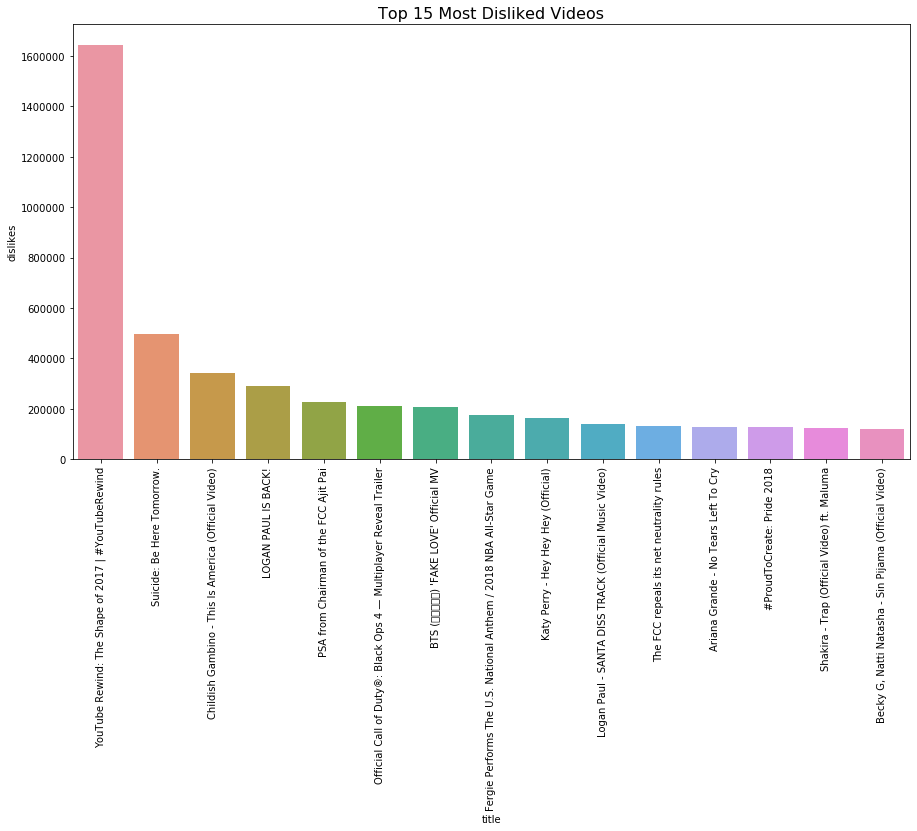

In [54]:
plt.figure(figsize = (15,8))
dislikechart = sns.barplot(x='title', y='dislikes', data=dislikedata)
plt.title('Top 15 Most Disliked Videos', fontsize=16)
tl = dislikechart.set_xticklabels(dislikechart.get_xticklabels(), rotation=90, fontsize=10)

In [55]:
# Showing top 15 most commented videos
comdata = newdf[filtered_columns].nlargest(15,'comment_count')
comdata

,title,views,likes,dislikes,comment_count
38273,BTS (방탄소년단) 'FAKE LOVE' Official MV,123010920,5613827,206892,1228655
6181,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,149376127,3093544,1643059,810698
15571,Suicide: Be Here Tomorrow.,24286474,1988746,497847,658130
3581,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,36857298,2729292,47896,546100
38547,Childish Gambino - This Is America (Official V...,225211923,5023450,343541,517232
22040,j-hope 'Daydream (백일몽)' MV,23416810,2672431,29088,477233
17063,LOGAN PAUL IS BACK!,14161833,1216340,291900,436698
30249,Melting Every Lipstick From Sephora Together,7645235,402569,9373,383762
35080,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,29741771,2700800,29341,371864
4997,Marvel Studios' Avengers: Infinity War Officia...,91933007,2625661,53709,350458


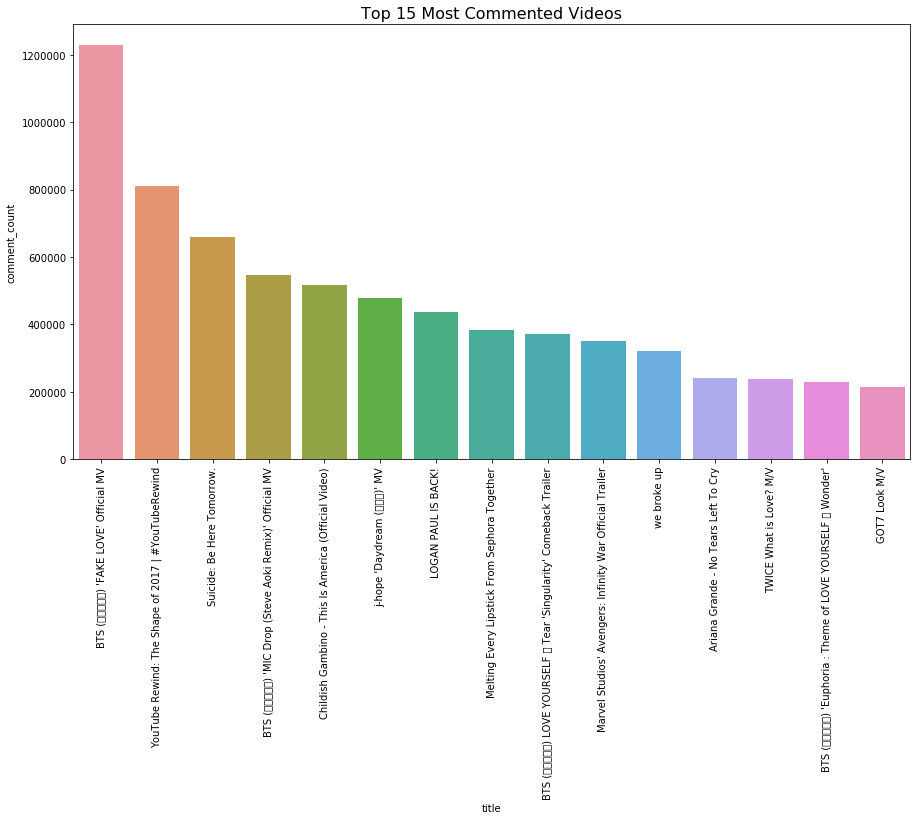

In [56]:
plt.figure(figsize = (15,8))
comchart = sns.barplot(x='title', y='comment_count', data=comdata)
plt.title('Top 15 Most Commented Videos', fontsize=16)
tl = comchart.set_xticklabels(comchart.get_xticklabels(), rotation=90, fontsize=10)

### Data by category

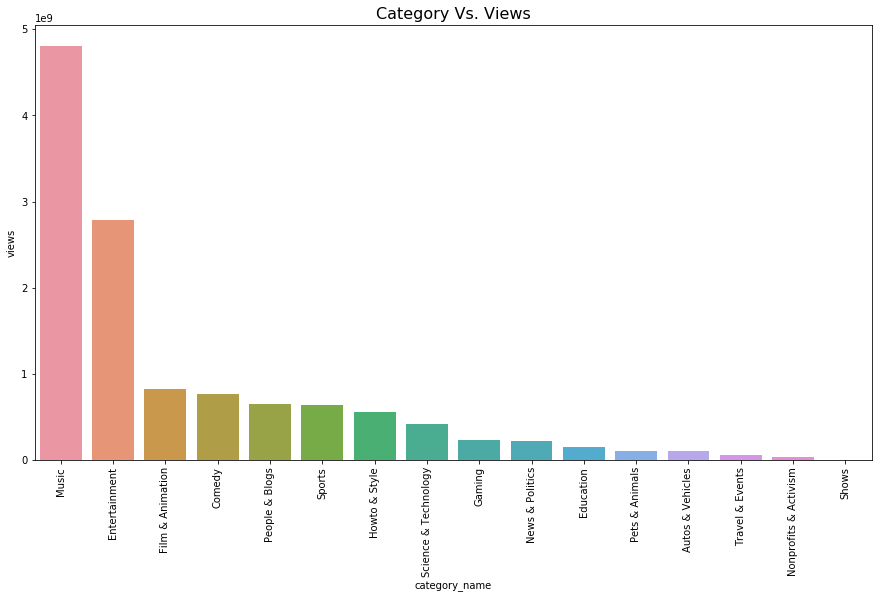

In [57]:
#Categories by amount of views
catv = newdf.groupby('category_name')['views'].sum().sort_values(ascending = False)
catvdf = pd.DataFrame(catv)

plt.figure(figsize = (15,8))
catvchart = sns.barplot(x=catvdf.index, y='views', data=catvdf)
plt.title('Category Vs. Views', fontsize=16)
tl = catvchart.set_xticklabels(catvchart.get_xticklabels(), rotation=90, fontsize=10)

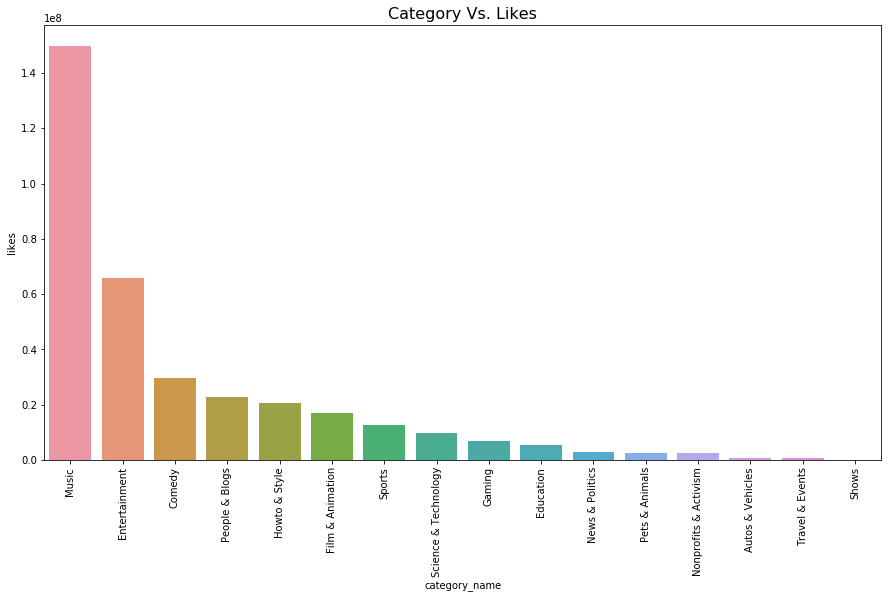

In [58]:
#Categories by amount of likes
catl = newdf.groupby('category_name')['likes'].sum().sort_values(ascending = False)
catldf = pd.DataFrame(catl)

plt.figure(figsize = (15,8))
catlchart = sns.barplot(x=catldf.index, y='likes', data=catldf)
plt.title('Category Vs. Likes', fontsize=16)
tl = catlchart.set_xticklabels(catlchart.get_xticklabels(), rotation=90, fontsize=10)

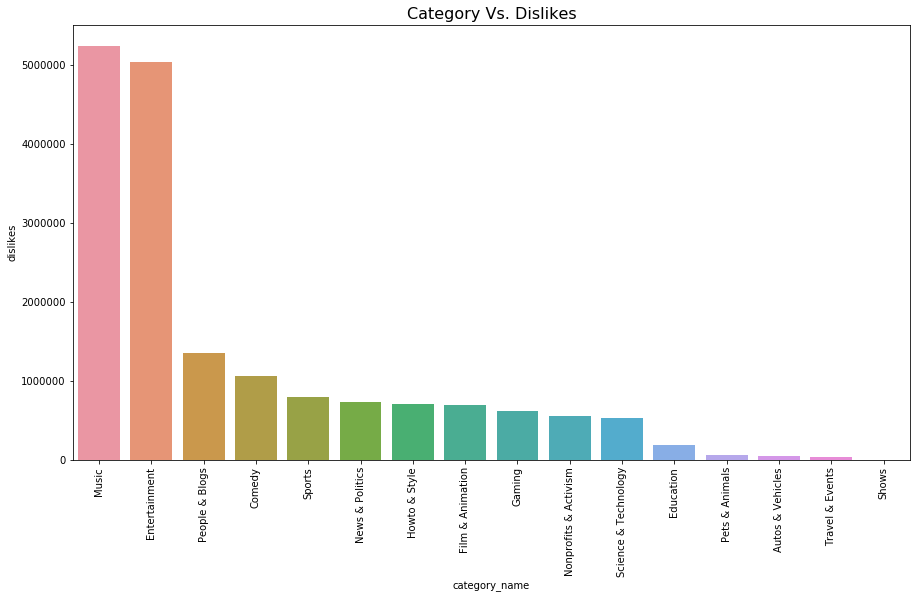

In [59]:
#Categories by amount of dislikes
catd = newdf.groupby('category_name')['dislikes'].sum().sort_values(ascending = False)
catddf = pd.DataFrame(catd)

plt.figure(figsize = (15,8))
catdchart = sns.barplot(x=catddf.index, y='dislikes', data=catddf)
plt.title('Category Vs. Dislikes', fontsize=16)
tl = catdchart.set_xticklabels(catdchart.get_xticklabels(), rotation=90, fontsize=10)

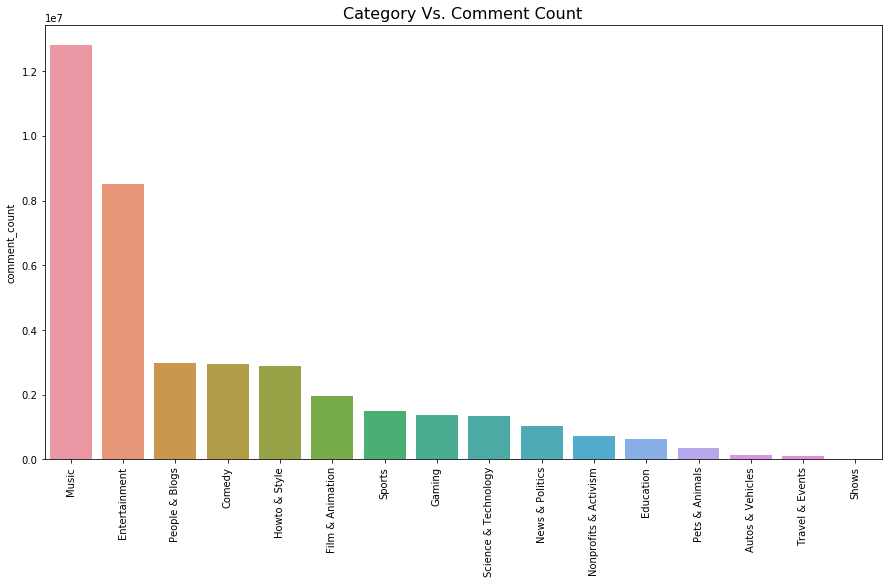

In [60]:
#Categories by amount of comments
catc = newdf.groupby('category_name')['comment_count'].sum().sort_values(ascending = False)
catcdf = pd.DataFrame(catc)

plt.figure(figsize = (15,8))
catcchart = sns.barplot(x=catcdf.index.values, y='comment_count', data=catcdf)
plt.title('Category Vs. Comment Count', fontsize=16)
tl = catcchart.set_xticklabels(catcchart.get_xticklabels(), rotation=90, fontsize=10)

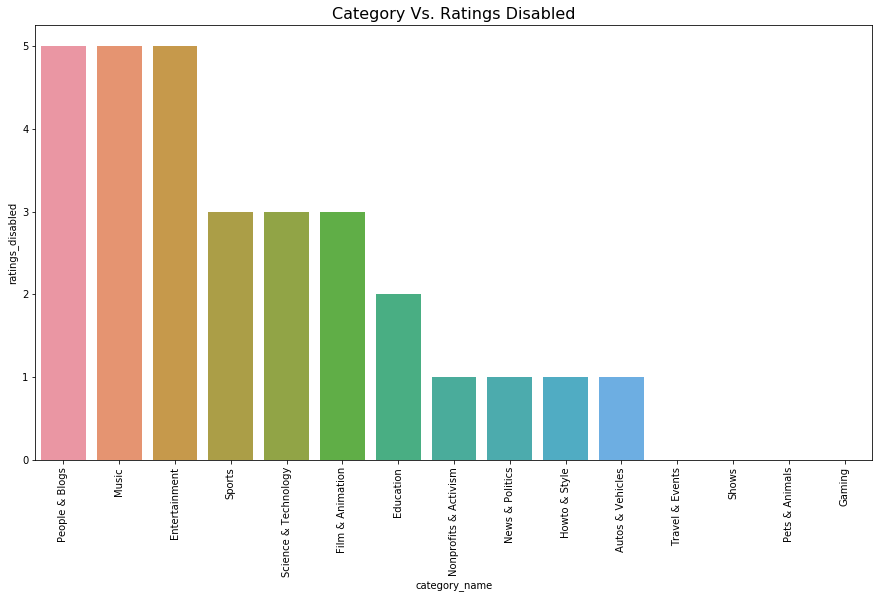

In [61]:
catrd = newdf.groupby('category_name')['ratings_disabled'].sum().sort_values(ascending = False)[:15]
catrddf = pd.DataFrame(catrd)
catrddf

plt.figure(figsize = (15,8))
catrdchart = sns.barplot(x=catrddf.index, y='ratings_disabled', data=catrddf)
plt.title('Category Vs. Ratings Disabled', fontsize=16)
tl = catrdchart.set_xticklabels(catrdchart.get_xticklabels(), rotation=90, fontsize=10)

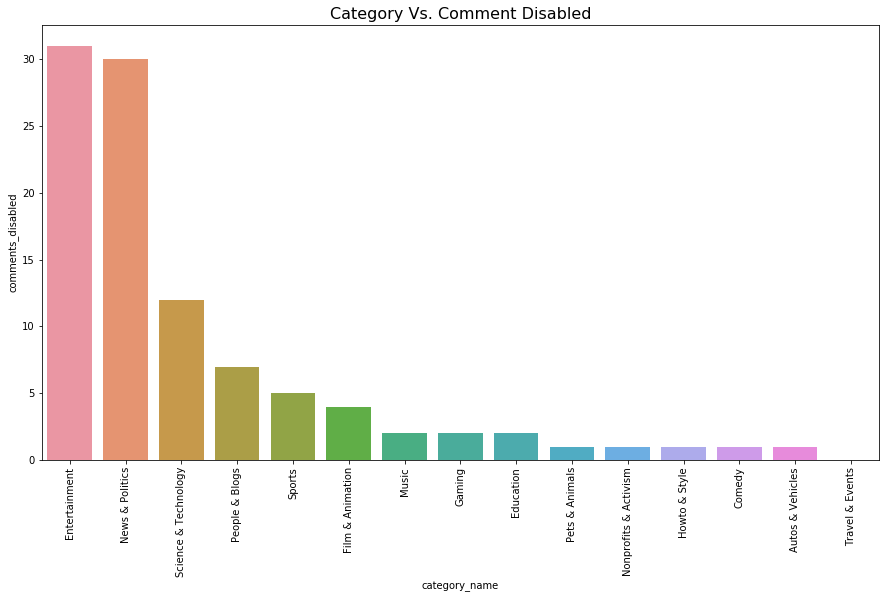

In [62]:
catcd = newdf.groupby('category_name')['comments_disabled'].sum().sort_values(ascending = False)[:15]
catcddf = pd.DataFrame(catcd)
catcddf

plt.figure(figsize = (15,8))
catcdchart = sns.barplot(x=catcddf.index, y='comments_disabled', data=catcddf)
plt.title('Category Vs. Comment Disabled', fontsize=16)
tl = catcdchart.set_xticklabels(catcdchart.get_xticklabels(), rotation=90, fontsize=10)

#### News & Politics is the top category with comments disabled

### Data by channel title

#### Top 15 trending channel title

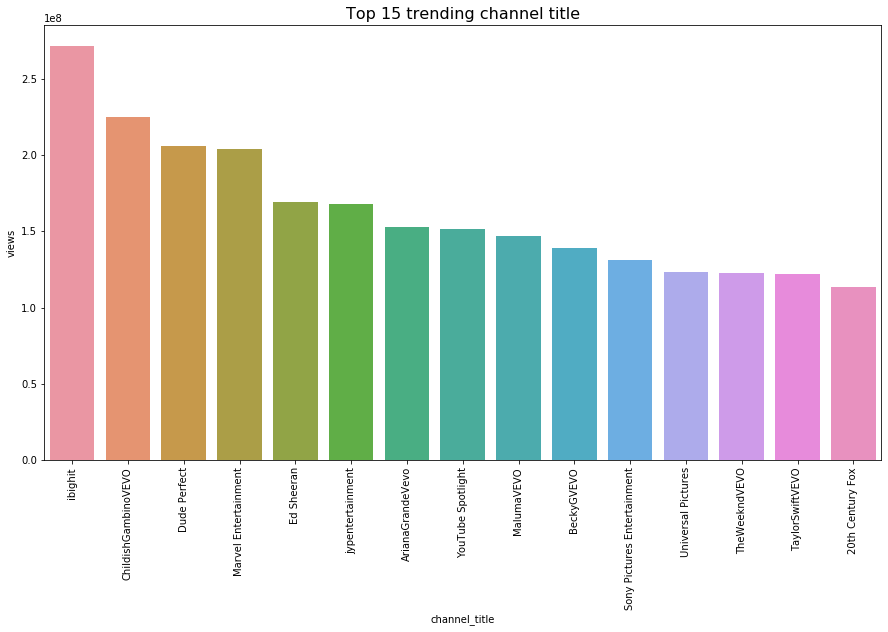

In [63]:
channeltitle = newdf.groupby('channel_title')['views'].sum().sort_values(ascending = False)[:15]
ctdf = pd.DataFrame(channeltitle)

plt.figure(figsize = (15,8))
ctchart = sns.barplot(x=ctdf.index, y='views', data=ctdf)
plt.title('Top 15 trending channel title', fontsize=16)
tl = ctchart.set_xticklabels(ctchart.get_xticklabels(), rotation=90, fontsize=10)

In [129]:
# Counting if there's a video error or if it has been removed
rem = newdf["video_error_or_removed"].value_counts()
remdf = pd.DataFrame(rem)
remdf

,video_error_or_removed
False,6251
True,3


Text(0.5, 1.0, 'Views by publish hour')

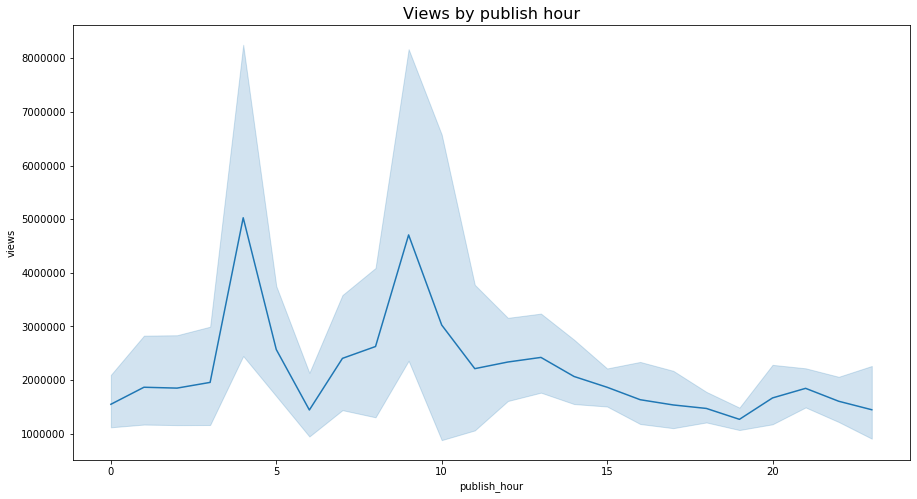

In [112]:
plt.figure(figsize = (15,8))
publishhour = sns.lineplot(
    x=newdf['publish_hour'],
    y=newdf['views'],
    data = newdf
)
plt.title('Views by publish hour', fontsize=16)

Text(0.5, 1.0, 'Title Length')

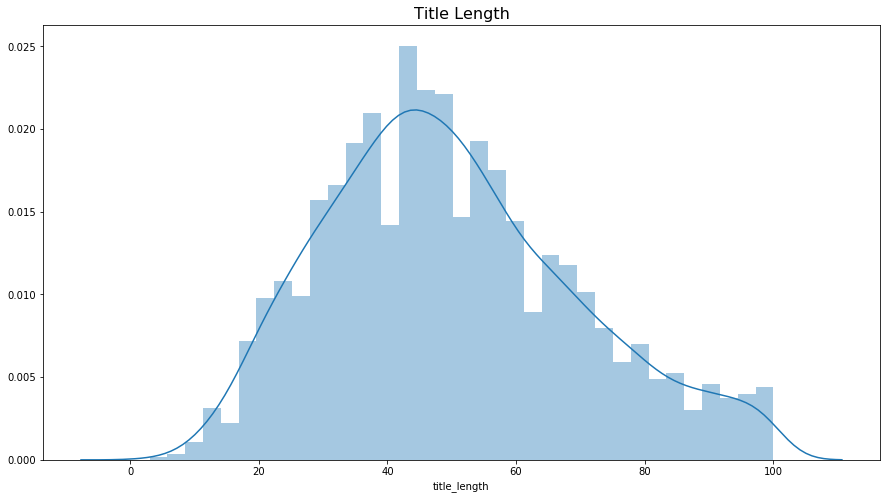

In [113]:
newdf["title_length"] = newdf["title"].apply(lambda x: len(x))

plt.figure(figsize = (15,8))

vcdist = sns.distplot(newdf['title_length'])
vcdist.set_title("Title Length", fontsize=16)

#### Most titles have length between 20 and 60 characteres

### Data distribution

In [77]:
#Log transformation
mainvariables = ['views', 'likes', 'dislikes', 'comment_count', 'title_length']
df_log = newdf[mainvariables].applymap(lambda x: np.log(x+1))

# rename columns
df_log.columns = 'log_' + df_log.columns

# reset index
df_log.reset_index(drop=True, inplace=True)

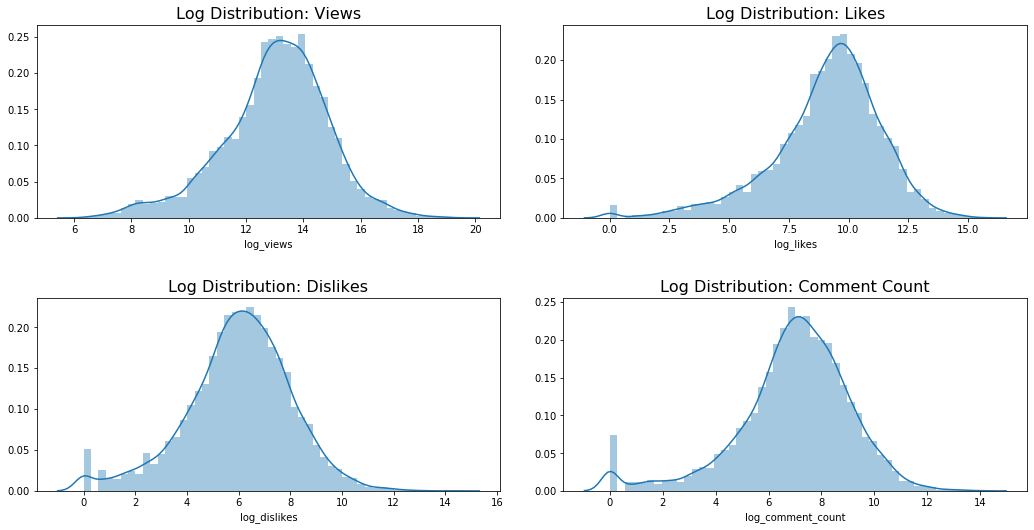

In [80]:
plt.figure(figsize = (15,8))

plt.subplot(221)
vcdist = sns.distplot(df_log['log_views'])
vcdist.set_title("Log Distribution: Views", fontsize=16)

plt.subplot(222)
lcdist = sns.distplot(df_log['log_likes'])
lcdist.set_title("Log Distribution: Likes", fontsize=16)

plt.subplot(223)
dcdist = sns.distplot(df_log['log_dislikes'])
dcdist.set_title("Log Distribution: Dislikes", fontsize=16)

plt.subplot(224)
ccdist = sns.distplot(df_log['log_comment_count'])
ccdist.set_title("Log Distribution: Comment Count", fontsize=16)

plt.tight_layout(pad=3.0)

### Correlation between variables

In [81]:
corr = newdf[mainvariables].corr()
corr

,views,likes,dislikes,comment_count,title_length
views,1.000000,0.833766,0.531385,0.627749,-0.041139
likes,0.833766,1.000000,0.483272,0.837665,-0.080868
dislikes,0.531385,0.483272,1.000000,0.620897,-0.023950
comment_count,0.627749,0.837665,0.620897,1.000000,-0.064771
title_length,-0.041139,-0.080868,-0.023950,-0.064771,1.000000


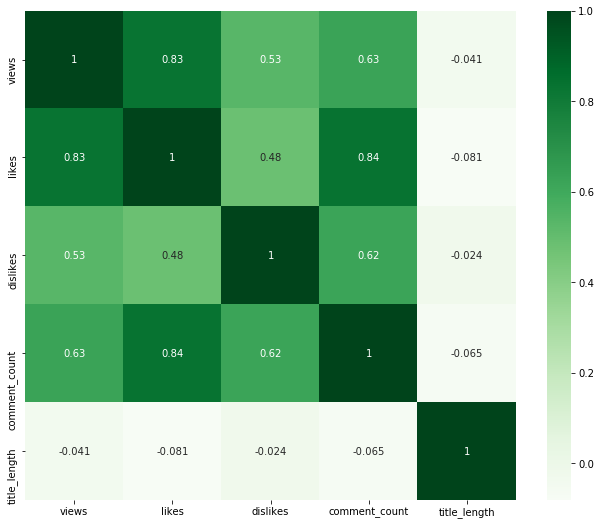

In [82]:
plt.subplots(figsize=(11, 9))
# plot heatmap
sns.heatmap(corr, cmap="Greens", annot=True)
plt.show()

Text(0.5, 1.0, 'Likes Vs. Views')

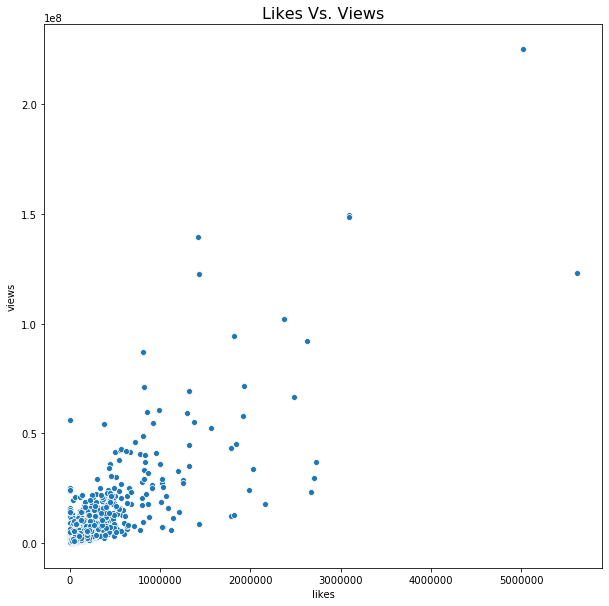

In [87]:
plt.figure(figsize = (10,10))
sns.scatterplot(x='likes', y='views', data=newdf)
plt.title('Likes Vs. Views', fontsize=16)

Text(0.5, 1.0, 'Dislikes Vs. Views')

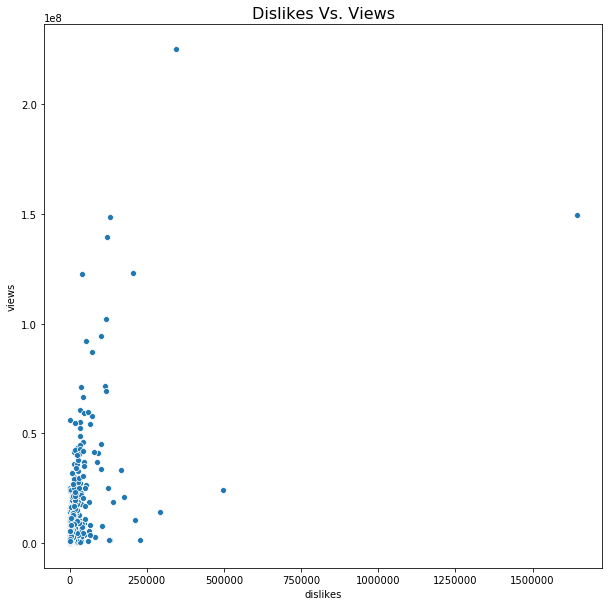

In [86]:
plt.figure(figsize = (10,10))
sns.scatterplot(x='dislikes', y='views', data=newdf)
plt.title('Dislikes Vs. Views', fontsize=16)

Text(0.5, 1.0, 'Comment Count Vs. Views')

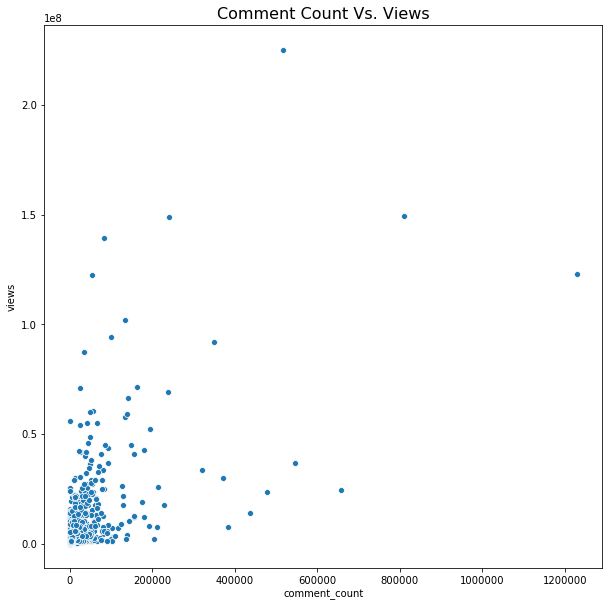

In [85]:
plt.figure(figsize = (10,10))
sns.scatterplot(x='comment_count', y='views', data=newdf)
plt.title('Comment Count Vs. Views', fontsize=16)

Text(0.5, 1.0, 'Title Length Vs. Views')

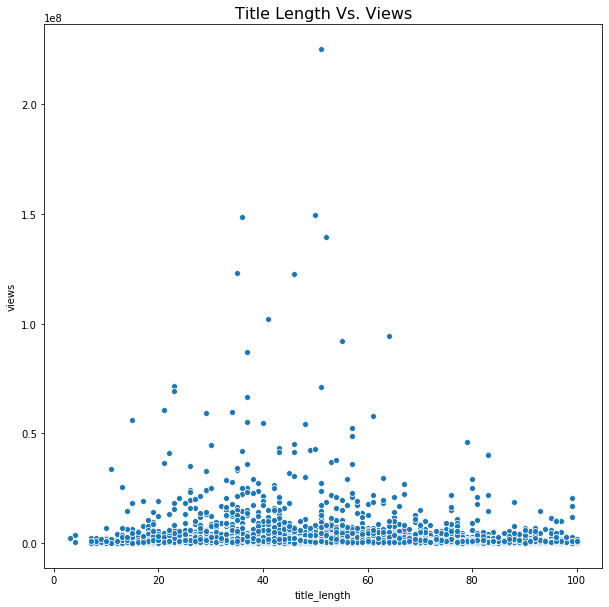

In [84]:
plt.figure(figsize = (10,10))
sns.scatterplot(x='title_length', y='views', data=newdf)
plt.title('Title Length Vs. Views', fontsize=16)

(-0.5, 1199.5, 499.5, -0.5)

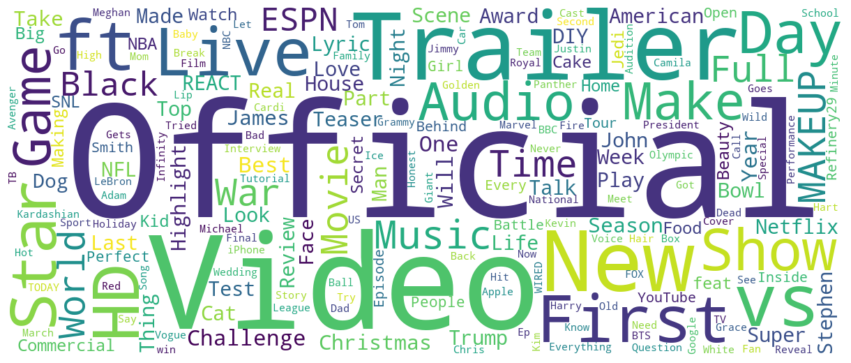

In [110]:
# Title word count
words_title = list(newdf["title"].apply(lambda x: x.split()))
words_title = [x for y in words_title for x in y]
words_title

wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white").generate(" ".join(words_title))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

#### The words "Official" and "Video" are the most common among title names

(-0.5, 1199.5, 499.5, -0.5)

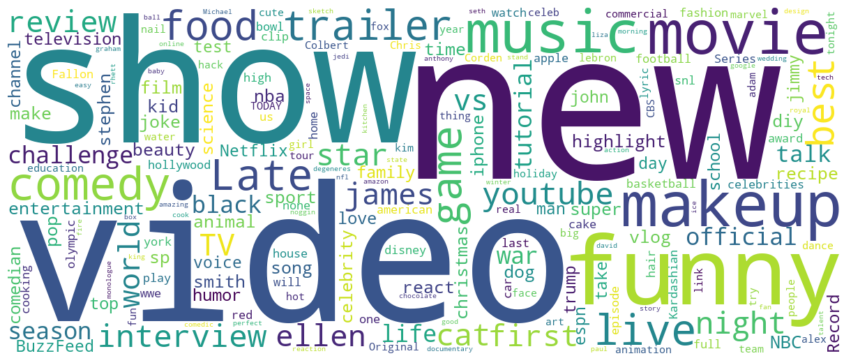

In [111]:
# Tags word count
words_tags = list(newdf["tags"].apply(lambda x: x.split()))
words_tags = [x for y in words_tags for x in y]
words_tags

wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white").generate(" ".join(words_tags))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

# Conclusions
- The dataset we analyzed contained 40949 observations, having duplicates where the same video appeared multiple times if it was trending on multiple days;
- After removing duplicates, the category name that most trended in this dataset was Entertainment with 1595 videos, followed by Music with 794 videos;
- The category name that least trended in this dataset was 'Shows', with 4 videos, followed by 'Nonprofits & Activism' with 13 videos;
- There is a strong positive correlation between the number of views and the number of likes; there is also a strong positive correlation between the number of likes and the number of comment_count;
- The most common words among title names are 'Official' and 'Video';
- Most used tags include the words 'show', 'new' and 'video'